In [1]:
#источник: https://github.com/ritvikmath/YouTubeVideoCode/blob/main/Gradient%20Descent.ipynb

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Text(0.5, 1.0, 'Data')

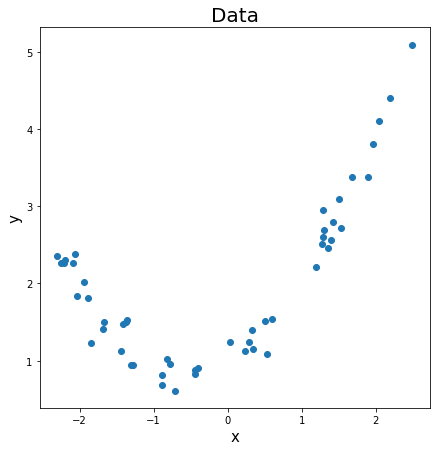

In [16]:
numvals = 50 #количество наблюденных значений
true_w = 0.5 #действительное значение параметра w

#зададим значения иксов и игреков наблюденной функции
xvals = np.sort(5*(np.random.random(numvals) - 0.5))
#yvals = true_w*(xvals + xvals**2) + np.random.normal(0, 0.1, numvals)
#yvals[int(numvals*0.1):] += 1
yvals = true_w*(xvals + xvals**2) + np.random.normal(0, 0.2, numvals)
yvals += 1

#построим график наблюденных значений
plt.figure(figsize = (7,7))
plt.scatter(xvals, yvals)
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.title('Data', fontsize = 20)

In [17]:
#найдем разность между наблюденными и теоретически заданными значениями для заданного параметра w (loss function)
def get_loss(w, xvals, yvals):
    return np.sum((w*xvals + w*xvals**2 - yvals)**2)

In [18]:
#рассчитаем производную loss function для заданного значения параметра w
def get_gradient(w, xvals, yvals):
    grad = np.sum(2*(xvals + xvals**2)*(w*xvals + w*xvals**2 - yvals))
    return grad

Text(0.5, 1.0, 'Loss Function')

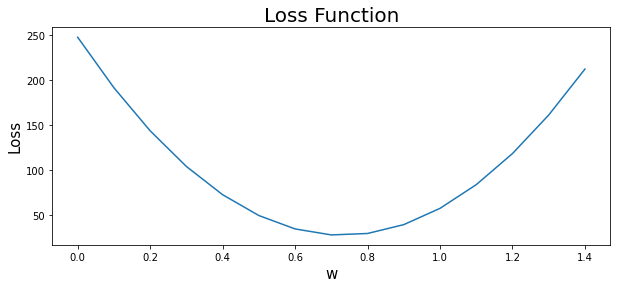

In [19]:
#построим график loss function от параметра w
wvals = np.arange(0, 1.5, 0.1)
lossvals = [get_loss(w, xvals, yvals) for w in wvals]

plt.figure(figsize = (10, 4))
plt.plot(wvals, lossvals)
plt.xlabel('w', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.title('Loss Function', fontsize = 20)

Text(0.5, 1.0, 'Gradient')

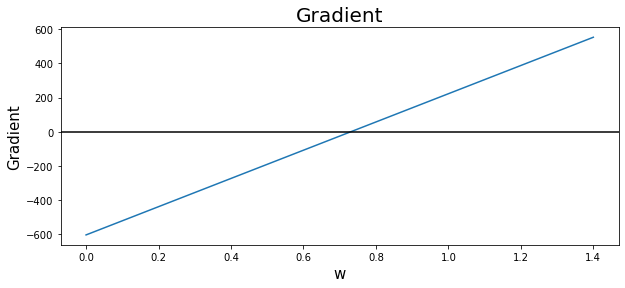

In [20]:
#построим график производной от параметра w
wvals = np.arange(0, 1.5, 0.1)
gradvals = [get_gradient(w, xvals, yvals) for w in wvals]

wzero = np.where(gradvals == 0)

plt.figure(figsize = (10, 4))
plt.plot(wvals, gradvals)
plt.axhline(0, color = 'k')
#plt.vlines(wzero, gradvals[0], gradvals[-1], color = 'g', linestyles = 'dashed')   #что-то не рисуется, надо разобраться
plt.xlabel('w', fontsize = 15)
plt.ylabel('Gradient', fontsize = 15)
plt.title('Gradient', fontsize = 20)

In [21]:
# запустим механизм градиентного спуска
def perform_gradient_descent(init_w, eta, num_iters, get_gradient):
    # init_w - начальное значение w
    # eta - параметр, который регулирует, насколько большой будет шаг к следующему значению w
    # num_iters - количество итераций
    # get_gradient - функция, возвращающая производную функционала невязки для определенного w
    
    
    # создаем массив из одного элемента - начального значения w, далее с каждой итерацией будем его пополнять
    w_vals = [init_w]
    
    # выполняем алгоритм для заданного числа итераций
    for _ in range(num_iters):
        
        # рассчитаем производную от последнего значения в массиве параметра w
        grad = get_gradient(w_vals[-1], xvals, yvals)
        
        # пополняем массив w следующим значением, при котором функционал невязки меньше
        w_vals.append(w_vals[-1] - eta*grad)
    
    # возвращаем массив значений w, последнее значение в массиве - w, при которой функционал невязки наименьший
    return w_vals

Text(0.5, 1.0, 'Gradient Descent Progress \nFinal w: 0.72')

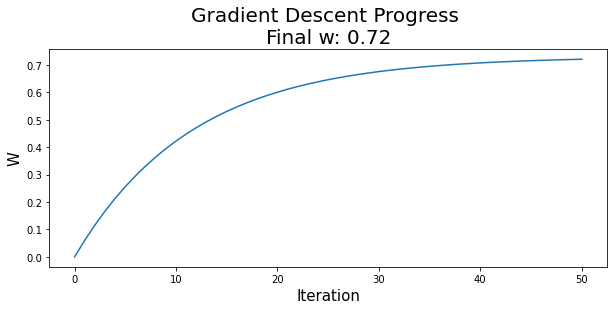

In [22]:
w_vals = perform_gradient_descent(0, 0.0001, 50, get_gradient)

plt.figure(figsize = (10, 4))
plt.plot(w_vals)
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('W', fontsize = 15)
plt.title('Gradient Descent Progress \nFinal w: %s'%round(w_vals[-1], 2), fontsize = 20)

Text(0.5, 1.0, 'Fitted Model')

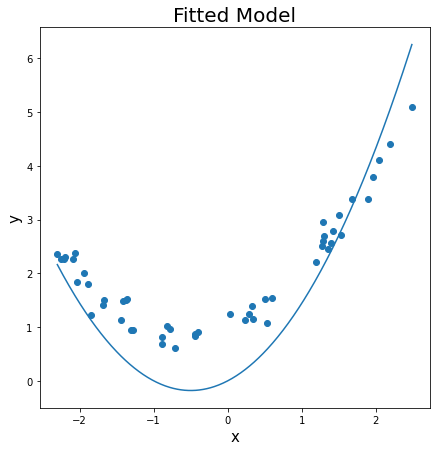

In [23]:
#построим на одном графике наблюденные и подобранные теоретические значения
xrange = np.arange(xvals.min(), xvals.max(), 0.01)
pred_yvals_loss1 = w_vals[-1]*(xrange + xrange**2)

plt.figure(figsize = (7,7))
plt.scatter(xvals, yvals)
plt.plot(xrange, pred_yvals_loss1)
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.title('Fitted Model', fontsize = 20)

## Custom Loss Function 1

Text(0.5, 1.0, 'Custom Function')

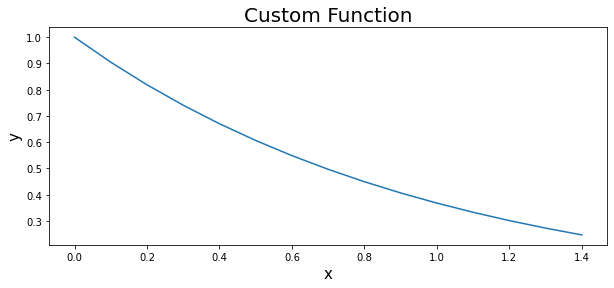

In [126]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 1.5, 0.1)
y = np.exp(-x)

plt.figure(figsize = (10, 4))
plt.plot(x, y)
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.title('Custom Function', fontsize = 20)

In [127]:
def get_loss(w, xvals, yvals):
    ivals = np.arange(1, len(xvals) + 1)
    return np.sum(np.exp(-ivals)*(w*xvals + w*xvals**2 - yvals)**2)

In [128]:
def get_gradient(w, xvals, yvals):
    ivals = np.arange(1, len(xvals) + 1)
    grad = np.sum(2*np.exp(-ivals)*(xvals + xvals**2)*(w*xvals + w*xvals**2 - yvals))
    return grad

Text(0.5, 1.0, 'Gradient')

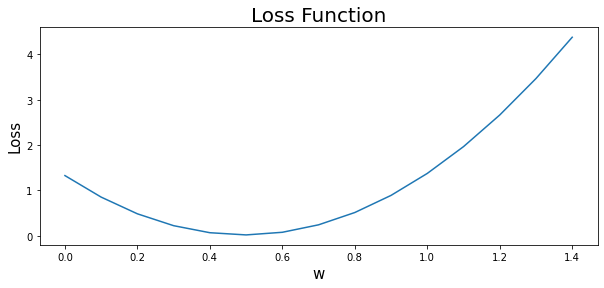

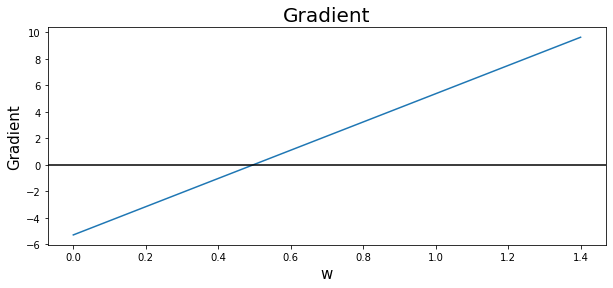

In [129]:
wvals = np.arange(0, 1.5, 0.1)
lossvals = [get_loss(w, xvals, yvals) for w in wvals]
gradvals = [get_gradient(w, xvals, yvals) for w in wvals]

plt.figure(figsize = (10, 4))
plt.plot(wvals, lossvals)
plt.xlabel('w', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.title('Loss Function', fontsize = 20)

plt.figure(figsize = (10, 4))
plt.plot(wvals, gradvals)
plt.axhline(0, color = 'k')
plt.xlabel('w', fontsize = 15)
plt.ylabel('Gradient', fontsize = 15)
plt.title('Gradient', fontsize = 20)

In [130]:
def perform_gradient_descent(init_w, eta, num_iters, get_gradient):
    w_vals = [init_w]
    for _ in range(num_iters):
        grad = get_gradient(w_vals[-1], xvals, yvals)
        w_vals.append(w_vals[-1] - eta*grad)
    return w_vals

Text(0.5, 1.0, 'Gradient Descent Progress \nFinal w: 0.49')

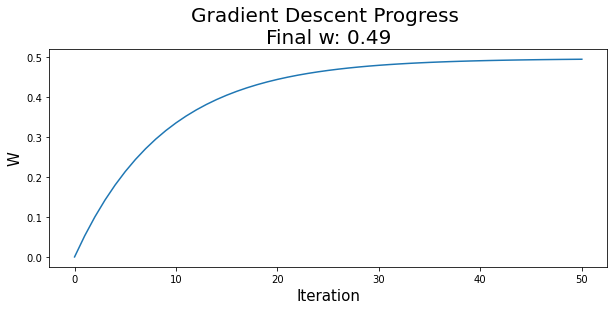

In [131]:
w_vals = perform_gradient_descent(0, 0.01, 50, get_gradient)

plt.figure(figsize = (10, 4))
plt.plot(w_vals)
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('W', fontsize = 15)
plt.title('Gradient Descent Progress \nFinal w: %s'%round(w_vals[-1], 2), fontsize = 20)

Text(0.5, 1.0, 'Fitted Model')

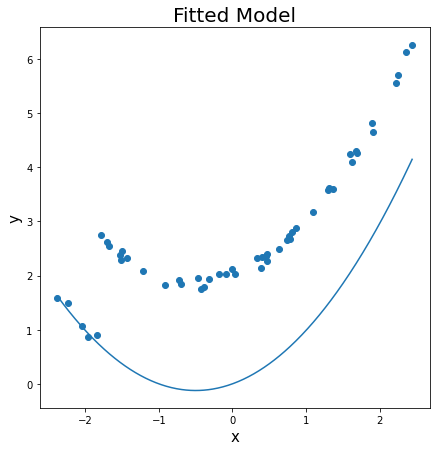

In [132]:
xrange = np.arange(xvals.min(), xvals.max(), 0.01)
pred_yvals_loss2 = w_vals[-1]*(xrange + xrange**2)

plt.figure(figsize = (7,7))
plt.scatter(xvals, yvals)
plt.plot(xrange, pred_yvals_loss2)
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.title('Fitted Model', fontsize = 20)

Text(0.5, 1.0, 'Fitted Model')

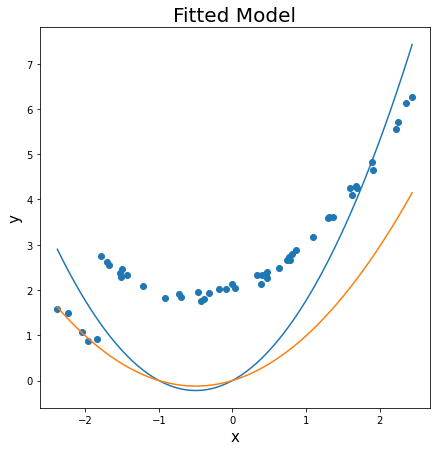

In [133]:
plt.figure(figsize = (7,7))
plt.scatter(xvals, yvals)
plt.plot(xrange, pred_yvals_loss1)
plt.plot(xrange, pred_yvals_loss2)
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.title('Fitted Model', fontsize = 20)